# sympy 
包可以直接通过代码来描述公式，可以直接求导
也可以通过 sympy 包来自动求导，不需要自己去推演。

In [3]:
!pip install sympy

In [9]:
import sympy
sympy.init_printing(use_unicode=True)
x = sympy.symbols('x')
w,b = sympy.symbols('w b')

In [14]:
sympy.diff(w * sympy.sin(x) + b,x)

In [12]:
x**2

# tensor

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt

In [19]:
import tensorflow as tf
import numpy as np

# Constant

In [21]:
c = tf.constant([1,2,3])
print(c)

Tensor("Const:0", shape=(3,), dtype=int32)


In [22]:
type(c)

tensorflow.python.framework.ops.Tensor

In [25]:
g = tf.get_default_graph()
g.as_graph_def().node

[name: "Const"
op: "Const"
attr {
  key: "dtype"
  value {
    type: DT_INT32
  }
}
attr {
  key: "value"
  value {
    tensor {
      dtype: DT_INT32
      tensor_shape {
        dim {
          size: 3
        }
      }
      tensor_content: "\001\000\000\000\002\000\000\000\003\000\000\000"
    }
  }
}
]

In [26]:
sess = tf.Session()
sess.run(c)

array([1, 2, 3], dtype=int32)

In [27]:
with tf.Session() as sess:
    r = sess.run(c)
    print(type(r))
    print(r)

<class 'numpy.ndarray'>
[1 2 3]


In [29]:
c2 = c + c
print(c2)

Tensor("add_1:0", shape=(3,), dtype=int32)


In [30]:
g = tf.get_default_graph()
g.as_graph_def().node

[name: "Const"
op: "Const"
attr {
  key: "dtype"
  value {
    type: DT_INT32
  }
}
attr {
  key: "value"
  value {
    tensor {
      dtype: DT_INT32
      tensor_shape {
        dim {
          size: 3
        }
      }
      tensor_content: "\001\000\000\000\002\000\000\000\003\000\000\000"
    }
  }
}
, name: "add"
op: "Add"
input: "Const"
input: "Const"
attr {
  key: "T"
  value {
    type: DT_INT32
  }
}
, name: "add_1"
op: "Add"
input: "Const"
input: "Const"
attr {
  key: "T"
  value {
    type: DT_INT32
  }
}
]

In [31]:
with tf.Session() as sess:
    r = sess.run(c2)
    print(type(r))
    print(r)

<class 'numpy.ndarray'>
[2 4 6]


# 随机数

In [37]:
sess = tf.Session()
r = tf.random_uniform([10],-1,1.0) # 产生 10 个 [-1,1] 的随机数
r

<tf.Tensor 'random_uniform_2:0' shape=(10,) dtype=float32>

In [38]:
sess.run(r)

array([-0.00604677, -0.57598567,  0.58657289,  0.43641615, -0.2092042 ,
       -0.90773439,  0.79386401, -0.31341887,  0.9434824 ,  0.77836251], dtype=float32)

In [39]:
# Variable


In [40]:
w = tf.Variable(tf.random_uniform([1],-1,1.0),name='w')
b = tf.Variable(tf.zeros([1]),name='b')

In [42]:
sess.run(w) ## 变量默认没有初始化的操作

FailedPreconditionError: Attempting to use uninitialized value w
	 [[Node: _send_w_0 = _Send[T=DT_FLOAT, client_terminated=true, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/cpu:0", send_device_incarnation=3307529096265022738, tensor_name="w:0", _device="/job:localhost/replica:0/task:0/cpu:0"](w)]]

In [44]:
init = tf.global_variables_initializer()
sess.run(init)
sess.run(w)

array([ 0.47264075], dtype=float32)

In [47]:
sess.run(w) ## 如果不重新初始化，值不变

array([-0.45730233], dtype=float32)

In [48]:
sess.run(init) ## 重新初始化才能得到一个新的值
sess.run(w)

array([ 0.14249063], dtype=float32)

# 线性回归

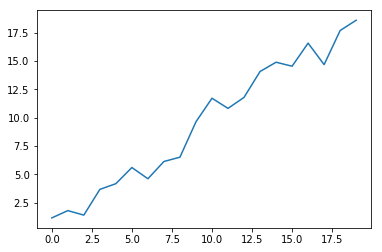

In [49]:
x = np.arange(0,20)
y = x + np.random.normal(size=20)
plt.plot(x,y)

In [54]:
tf.reset_default_graph

w = tf.Variable(tf.random_uniform([1],-1,1),name='w')
b = tf.Variable(tf.zeros([1]),name='b')
y_bar = w*x + b
cost = tf.reduce_mean((y_bar - y) ** 2)

In [55]:
sess.run(tf.global_variables_initializer())
print(sess.run([w,b]))
print(sess.run(cost))

[array([-0.05618191], dtype=float32), array([ 0.], dtype=float32)]
136.154


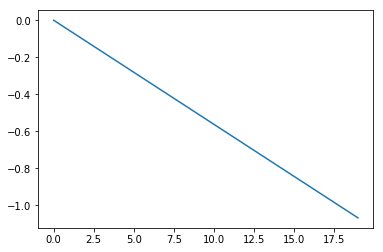

In [56]:
y_foo = sess.run(y_bar) ## 划出实际的图
plt.plot(x,y_foo)

In [59]:
y_foo = np.array([-0.05618191]) * x + 0
np.mean((y_foo - y)**2) ## 手动求解结果

# 梯度下降

In [62]:
train_step = tf.train.GradientDescentOptimizer(0.0001).minimize(cost)
costs = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(100):
        sess.run(train_step)
        cost_v = sess.run(cost)
        costs.append(cost_v)
        print(cost_v)
        print(sess.run([w,b]))

4.88745
[array([ 0.81188244], dtype=float32), array([ 0.00036801], dtype=float32)]
4.69494
[array([ 0.81628281], dtype=float32), array([ 0.00072738], dtype=float32)]
4.51189
[array([ 0.82057381], dtype=float32), array([ 0.00107831], dtype=float32)]
4.33782
[array([ 0.82475811], dtype=float32), array([ 0.00142102], dtype=float32)]
4.17229
[array([ 0.82883847], dtype=float32), array([ 0.00175572], dtype=float32)]
4.01488
[array([ 0.83281738], dtype=float32), array([ 0.00208259], dtype=float32)]
3.8652
[array([ 0.8366974], dtype=float32), array([ 0.00240184], dtype=float32)]
3.72287
[array([ 0.84048098], dtype=float32), array([ 0.00271365], dtype=float32)]
3.58752
[array([ 0.84417051], dtype=float32), array([ 0.00301821], dtype=float32)]
3.45881
[array([ 0.84776831], dtype=float32), array([ 0.0033157], dtype=float32)]
3.33642
[array([ 0.8512767], dtype=float32), array([ 0.00360629], dtype=float32)]
3.22003
[array([ 0.85469788], dtype=float32), array([ 0.00389016], dtype=float32)]
3.10936


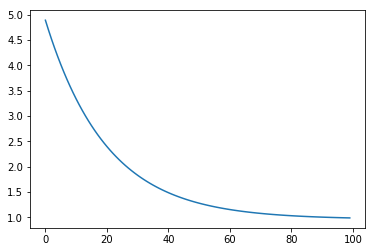

In [63]:
plt.plot(costs)

In [64]:
tf.reset_default_graph
x_p = tf.placeholder('float')
y_p = tf.placeholder('float')

w = tf.Variable(tf.random_uniform([1],-1,1),name='w')
b = tf.Variable(tf.zeros([1]),name='b')
y_bar = w*x_p + b
cost = tf.reduce_mean((y_bar - y_p) ** 2)

In [66]:
train_step = tf.train.GradientDescentOptimizer(0.0001).minimize(cost)
costs = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(100):
        feed_dict  = {x_p:x.astype(float),y_p:y}
        sess.run(train_step,feed_dict=feed_dict)
        print(sess.run(cost,feed_dict=feed_dict))
        print(sess.run([w,b]))

197.973
[array([-0.27313501], dtype=float32), array([ 0.00248176], dtype=float32)]
188.304
[array([-0.24193874], dtype=float32), array([ 0.00490223], dtype=float32)]
179.109
[array([-0.21151762], dtype=float32), array([ 0.00726295], dtype=float32)]
170.366
[array([-0.18185239], dtype=float32), array([ 0.0095654], dtype=float32)]
162.052
[array([-0.15292425], dtype=float32), array([ 0.01181102], dtype=float32)]
154.146
[array([-0.12471491], dtype=float32), array([ 0.01400123], dtype=float32)]
146.627
[array([-0.0972065], dtype=float32), array([ 0.01613741], dtype=float32)]
139.478
[array([-0.07038161], dtype=float32), array([ 0.01822089], dtype=float32)]
132.68
[array([-0.04422325], dtype=float32), array([ 0.02025299], dtype=float32)]
126.215
[array([-0.01871486], dtype=float32), array([ 0.02223498], dtype=float32)]
120.068
[array([ 0.0061597], dtype=float32), array([ 0.02416811], dtype=float32)]
114.222
[array([ 0.03041619], dtype=float32), array([ 0.02605359], dtype=float32)]
108.663


In [67]:
import tensorflow as tf

# The file path to save the data
# 文件保存路径
save_file = './kz-model.ckpt'

# Two Tensor Variables: weights and bias
# 两个 Tensor 变量：权重和偏置项
weights = tf.Variable(tf.truncated_normal([2, 3]))
bias = tf.Variable(tf.truncated_normal([3]))

# Class used to save and/or restore Tensor Variables
# 用来存取 Tensor 变量的类
saver = tf.train.Saver()

with tf.Session() as sess:
    # Initialize all the Variables
    # 初始化所有变量
    sess.run(tf.global_variables_initializer())

    # Show the values of weights and bias
   # 显示变量和权重
    print('Weights:')
    print(sess.run(weights))
    print('Bias:')
    print(sess.run(bias))

    # Save the model
    # 保存模型
    saver.save(sess, save_file)

Weights:
[[-0.54862791 -0.38017887  0.12576421]
 [-0.49905518  0.01469134 -0.7447024 ]]
Bias:
[ 0.61949354 -0.79687595 -0.81227446]


注意，你依然需要在 Python 中创建 weights 和 bias Tensors。tf.train.Saver.restore() 函数把之前保存的数据加载到  weights 和 bias 当中。
因为 tf.train.Saver.restore() 设定了 TensorFlow 变量，这里你不需要调用  tf.global_variables_initializer()了。

In [68]:
# Remove the previous weights and bias
# 移除之前的权重和偏置项
tf.reset_default_graph()

# Two Variables: weights and bias
# 两个变量：权重和偏置项
weights = tf.Variable(tf.truncated_normal([2, 3]))
bias = tf.Variable(tf.truncated_normal([3]))

# Class used to save and/or restore Tensor Variables
# 用来存取 Tensor 变量的类
saver = tf.train.Saver()

with tf.Session() as sess:
    # Load the weights and bias
    # 加载权重和偏置项
    saver.restore(sess, save_file)

    # Show the values of weights and bias
    # 显示权重和偏置项
    print('Weight:')
    print(sess.run(weights))
    print('Bias:')
    print(sess.run(bias))

Weight:
[[-0.54862791 -0.38017887  0.12576421]
 [-0.49905518  0.01469134 -0.7447024 ]]
Bias:
[ 0.61949354 -0.79687595 -0.81227446]
